In [ ]:
#samples_to_freq_spectrum_analysis_v1
#last updated 08_03_2024
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\samples_csv.csv')
file.info()
file.head()

file.describe()

%matplotlib notebook

pi=np.pi
def DTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(-1j*2*pi/N*n*k)
    return w

def IDTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(1j*2*pi/N*n*k)
    return w/N

hz=np.arange(1,121,1)
len(hz)

A=np.zeros((6,240),dtype=np.complex_)
for i in range(1,7,1):
    col_i='op_cl_op'+str(i)
    A[i-1]=np.matmul(DTFT(240),file[col_i][100:340])

plt.figure(4)
plt.subplot(111)
for i in range(6):
    plt.plot(hz,2*np.abs(A[i][1:121]))
"""



In [ ]:
#samples_to_freq_spectrum_analysis_v2
#last updated 09_03_2024
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\samples_csv.csv')
file.info()
file.head()

file.describe()

%matplotlib notebook

pi=np.pi
def DTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(-1j*2*pi/N*n*k)
    return w

def IDTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(1j*2*pi/N*n*k)
    return w/N

hz=np.arange(1,121,1)
len(hz)

sample_legend={1:'op_cl_op',2:'cl_rd_cl',3:'ex_fl_ex',4:'sp_pr_sp',5:'pn_op_pn'}

A=np.zeros((5,6,240),dtype=np.complex_)
for k in range(1,6,1):
    sample_label=sample_legend[k]
    for i in range(1,7,1):
        col_i=sample_label+str(i)
        A[k-1][i-1]=np.matmul(DTFT(240),file[col_i][100:340])

plt.figure(5)   				#plots for same gesture different people
for k in range(5):
    sample_label=sample_legend[k+1]
    plt.subplot(3,2,k+1)
    print(sample_label)
    for i in range(6):
        print(i)        
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend() 

plt.figure(6)					##plots for different gesture same people
for i in range(6):    
    plt.subplot(3,2,i+1)
    print(i)
    for k in range(5):
        print(sample_label)
        sample_label=sample_legend[k+1]
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend()
 """       
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\samples_csv.csv')
file.info()
file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     407 non-null    float64
 1   op_cl_op1  406 non-null    float64
 2   op_cl_op2  386 non-null    float64
 3   op_cl_op3  443 non-null    float64
 4   op_cl_op4  401 non-null    float64
 5   op_cl_op5  355 non-null    float64
 6   op_cl_op6  358 non-null    float64
 7   cl_rd_cl1  407 non-null    float64
 8   cl_rd_cl2  386 non-null    float64
 9   cl_rd_cl3  405 non-null    float64
 10  cl_rd_cl4  409 non-null    float64
 11  cl_rd_cl5  332 non-null    float64
 12  cl_rd_cl6  379 non-null    float64
 13  ex_fl_ex1  341 non-null    float64
 14  ex_fl_ex2  368 non-null    float64
 15  ex_fl_ex3  376 non-null    float64
 16  ex_fl_ex4  389 non-null    float64
 17  ex_fl_ex5  355 non-null    float64
 18  ex_fl_ex6  376 non-null    float64
 19  sp_pr_sp1  762 non-null    int64  
 20  sp_pr_sp2 

,sample,op_cl_op1,op_cl_op2,op_cl_op3,op_cl_op4,op_cl_op5,op_cl_op6,cl_rd_cl1,cl_rd_cl2,cl_rd_cl3,...,sp_pr_sp3,sp_pr_sp4,sp_pr_sp5,sp_pr_sp6,pn_op_pn1,pn_op_pn2,pn_op_pn3,pn_op_pn4,pn_op_pn5,pn_op_pn6
0,1.0,2.0,50.0,57.0,391.0,2.0,382.0,13.0,19.0,37.0,...,94.0,167.0,20.0,38.0,1.0,25.0,64.0,12.0,3.0,264.0
1,2.0,199.0,23.0,23.0,52.0,36.0,22.0,25.0,18.0,189.0,...,233.0,146.0,19.0,14.0,140.0,64.0,NaN,267.0,6.0,59.0
2,3.0,203.0,23.0,23.0,52.0,40.0,24.0,31.0,17.0,225.0,...,69.0,155.0,18.0,15.0,127.0,66.0,265.0,216.0,104.0,72.0
3,4.0,210.0,19.0,21.0,49.0,35.0,25.0,28.0,18.0,218.0,...,54.0,157.0,16.0,15.0,119.0,64.0,262.0,3.0,104.0,82.0
4,5.0,201.0,18.0,23.0,49.0,36.0,22.0,28.0,23.0,222.0,...,43.0,8.0,17.0,18.0,143.0,65.0,263.0,139.0,135.0,87.0


In [ ]:
file.describe()

In [5]:
%matplotlib notebook

In [6]:
pi=np.pi
def DTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(-1j*2*pi/N*n*k)
    return w

def IDTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(1j*2*pi/N*n*k)
    return w/N

In [7]:
hz=np.arange(1,121,1)
len(hz)

120

In [12]:
sample_legend={1:'op_cl_op',2:'cl_rd_cl',3:'ex_fl_ex',4:'sp_pr_sp',5:'pn_op_pn'}

In [14]:
A=np.zeros((5,6,240),dtype=np.complex_)
for k in range(1,6,1):
    sample_label=sample_legend[k]
    for i in range(1,7,1):
        col_i=sample_label+str(i)
        A[k-1][i-1]=np.matmul(DTFT(240),file[col_i][100:340])


<IPython.core.display.Javascript object>


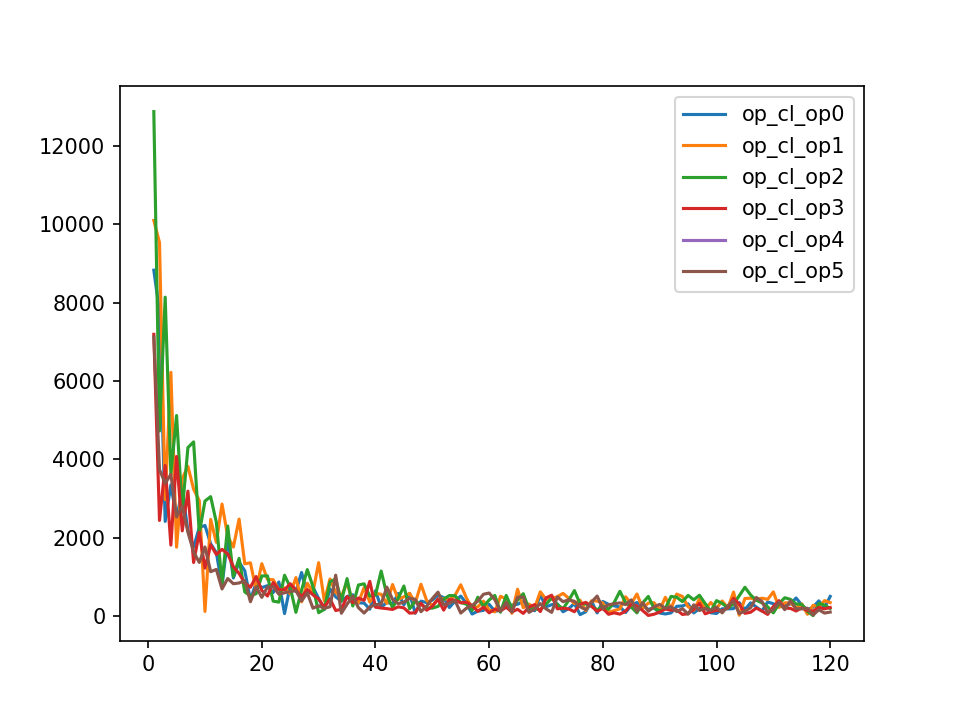

In [16]:
plt.figure(4)
plt.subplot(111)
for i in range(6):
    plt.plot(hz,2*np.abs(A[1][i][1:121]),label=sample_legend[1]+str(i))
    
plt.legend()    

<IPython.core.display.Javascript object>


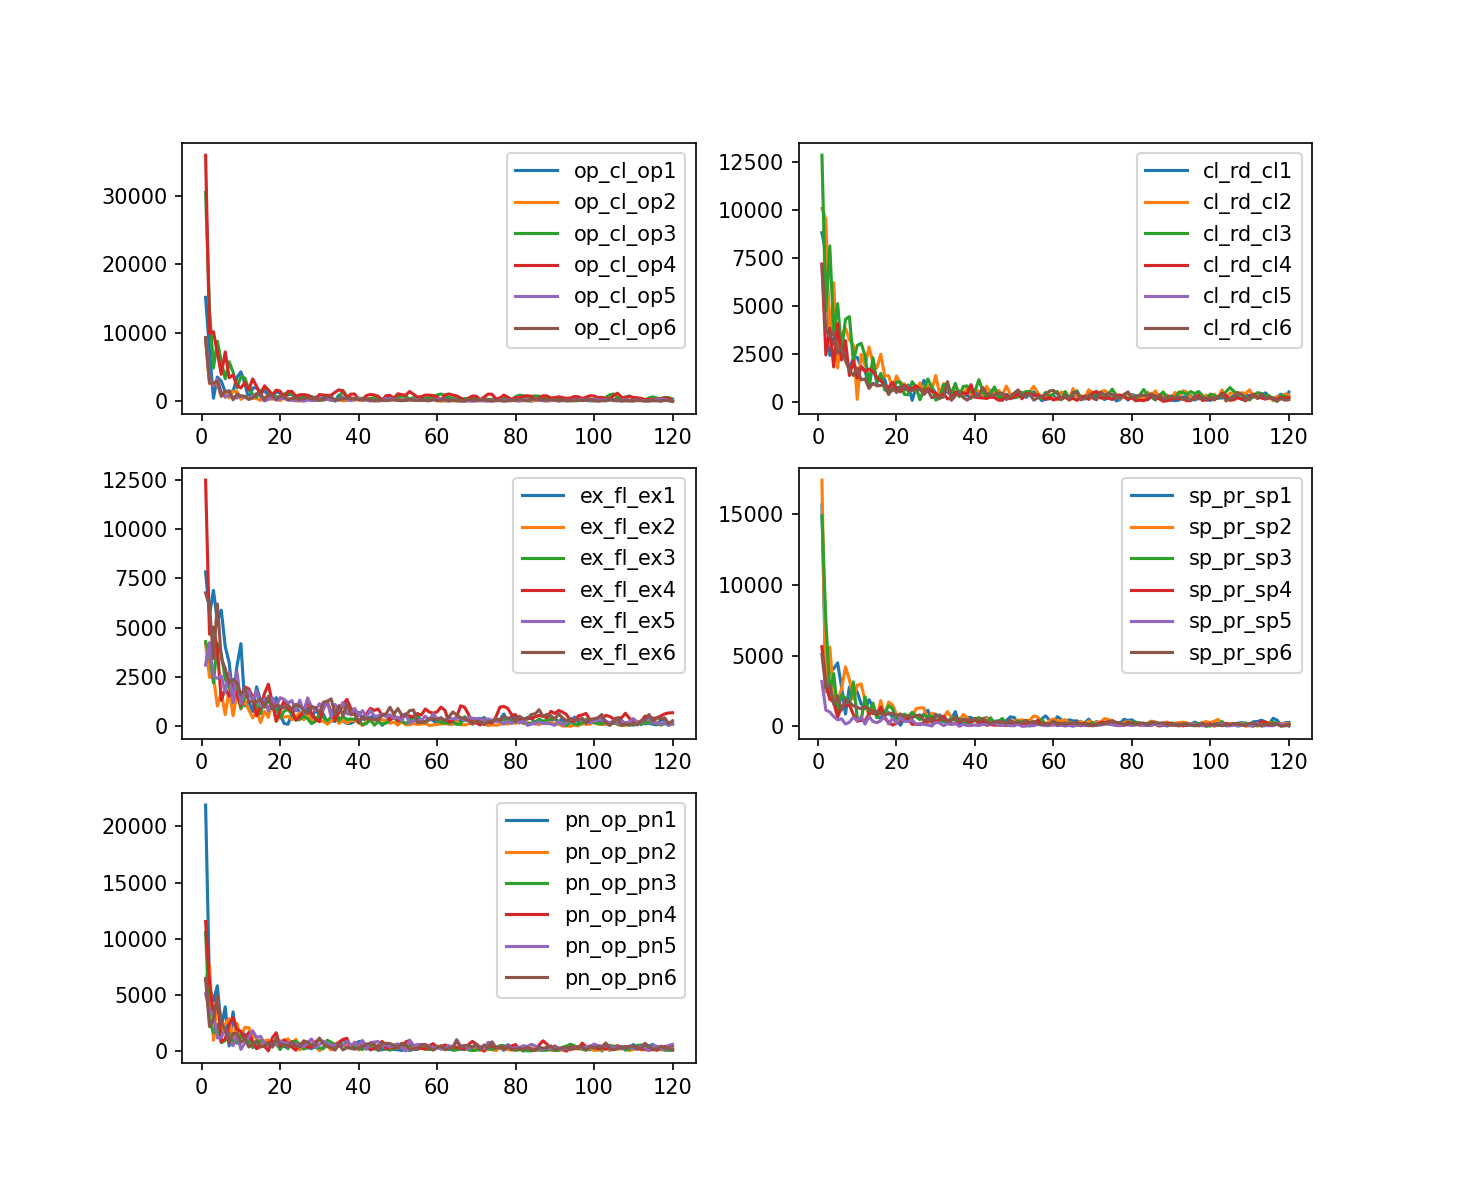

In [28]:
plt.figure(5)
for k in range(5):
    sample_label=sample_legend[k+1]
    plt.subplot(3,2,k+1)
    #print(sample_label)
    for i in range(6):
        #print(i)        
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend() 

<IPython.core.display.Javascript object>


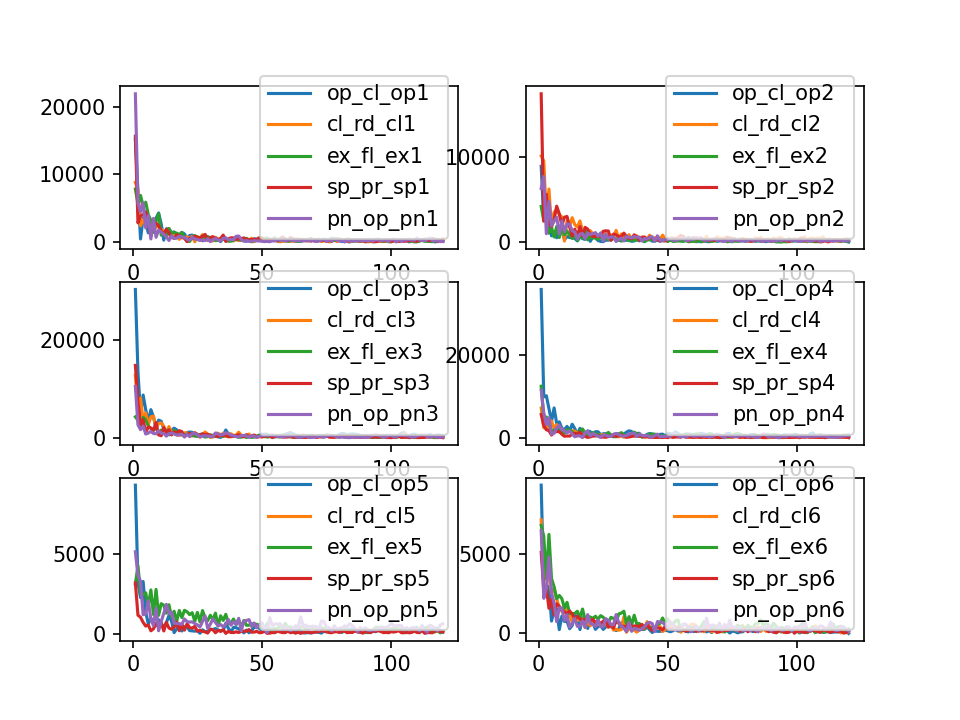

0
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp
1
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp
2
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp
3
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp
4
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp
5
pn_op_pn
op_cl_op
cl_rd_cl
ex_fl_ex
sp_pr_sp


In [25]:
plt.figure(6)
for i in range(6):    
    plt.subplot(3,2,i+1)
    #print(i)
    for k in range(5):
        #print(sample_label)
        sample_label=sample_legend[k+1]
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend()